### **Build a User-Based Recommender System**
**Goal:** Recommend items to users based on preferences of similar users using User-Based Collaborative Filtering.

**Simulate or Load User-Item Rating Data**


In [4]:
#We’ll create a simple user-movie rating matrix.
import pandas as pd
import numpy as np
# Simulated user-item ratings (0 = not rated)
ratings_dict = {
'User1': [5, 4, 0, 1, 0],
'User2': [4, 0, 0, 1, 2],
'User3': [1, 1, 0, 5, 4],
'User4': [0, 0, 5, 4, 5],
'User5': [1, 0, 4, 4, 0]
}
movies = ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E']
ratings = pd.DataFrame(ratings_dict, index=movies).T
print(ratings)

       Movie A  Movie B  Movie C  Movie D  Movie E
User1        5        4        0        1        0
User2        4        0        0        1        2
User3        1        1        0        5        4
User4        0        0        5        4        5
User5        1        0        4        4        0


**Compute User Similarity Matrix**

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
# Fill NaNs or zeros with 0 (assume unrated items)

user_sim = pd.DataFrame(
  cosine_similarity(ratings),
  index=ratings.index,
  columns=ratings.index
)
print(user_sim)

          User1     User2     User3     User4     User5
User1  1.000000  0.707107  0.329435  0.075974  0.241747
User2  0.707107  1.000000  0.565725  0.376051  0.303895
User3  0.329435  0.565725  1.000000  0.750851  0.557478
User4  0.075974  0.376051  0.750851  1.000000  0.771389
User5  0.241747  0.303895  0.557478  0.771389  1.000000


**Predict Ratings for a Target User**

We’ll compute a predicted score for unrated items based on weighted sum of ratings from similar users.

In [6]:
def get_recommendations(user_id, ratings_df, sim_matrix, top_n=2):
    # Get all ratings of the target user
    user_ratings = ratings_df.loc[user_id]

    # Identify items the user hasn't rated yet
    unrated_items = user_ratings[user_ratings == 0].index

    # Get similarity scores between the target user and all other users
    sim_scores = sim_matrix.loc[user_id]

    predicted_scores = {}

    # Loop through all items the user hasn't rated
    for item in unrated_items:
        total_sim = 0      # Sum of similarities
        weighted_sum = 0   # Sum of (similarity × rating)

        # Loop through all other users
        for other_user in ratings_df.index:
            if other_user == user_id:
                continue  # Skip the target user

            # Get the other user's rating for the item
            rating = ratings_df.loc[other_user, item]

            if rating > 0:  # Only consider users who rated the item
                sim = sim_scores[other_user]  # Similarity with the target user
                weighted_sum += sim * rating
                total_sim += sim

        # Compute the predicted score if there's at least one similar rating
        if total_sim > 0:
            predicted_scores[item] = weighted_sum / total_sim

    # Return the top N items sorted by predicted score in descending order
    return sorted(predicted_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Example usage:
# Make sure 'ratings' is a user-item matrix (DataFrame)
# and 'user_sim' is a user-user similarity matrix (DataFrame)
recommendations = get_recommendations('User1', ratings, user_sim)
print("Recommendations for User1:", recommendations)

Recommendations for User1: [('Movie C', np.float64(4.2391211523659695)), ('Movie E', np.float64(2.797104066480733))]


**🔍 Explanation:**

('Movie C', 4.24) → The system predicts that User1 would rate "Movie C" around 4.24 out of 5, so it's the top recommendation.

('Movie E', 2.80) → The system predicts User1 would rate "Movie E" around 2.80, which is less preferred, but still the second-best option among unrated movies.

**Visualize Similarity**

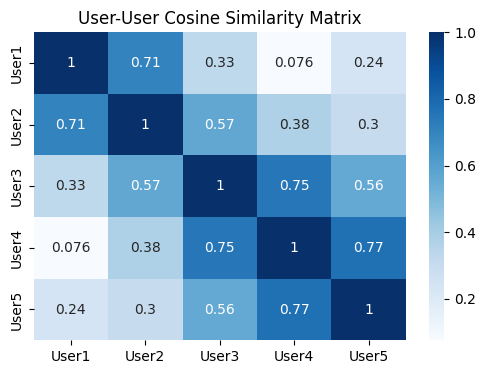

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(user_sim, annot=True, cmap='Blues')
plt.title("User-User Cosine Similarity Matrix")
plt.show()

### 📽️ Project Summary: User-Based Recommender System

This project builds a **User-Based Collaborative Filtering** recommender system to suggest movies to users based on ratings from similar users.

- **Technique:** User-based Collaborative Filtering
- **Similarity Metric:** Cosine Similarity
- **Input:** A user-item rating matrix (e.g., users rating movies from 0–5, where 0 = not rated)
- **Process:**
  1. Compute user-user similarity using `cosine_similarity`.
  2. Predict ratings for unrated movies using a weighted average of similar users' ratings.
  3. Recommend the top-N highest predicted movies for each user.
- **Output:** Personalized recommendations (e.g., `Recommendations for User1: [('Movie C', 4.24), ('Movie E', 2.80)]`)

This helps simulate how platforms like Netflix or Amazon suggest items based on what similar users liked.
